In [3]:
import xarray as xr
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
from math import sqrt

In [4]:
lat_st, lon_st = 34.22, 92.43#站点数据
ds = xr.open_dataset('D:/Data/CMA_Meteo/surface_met2474_daily.nc',engine='netcdf4')
lat = ds['lat'].values.tolist()#读取纬度并转化为列表格式
lon = ds['lon'].values.tolist()#读取经度
lat_index = lat.index(min(lat,key = lambda x:abs(x - lat_st)))
lon_index = lon.index(min(lon,key = lambda x:abs(x - lon_st)))
if lat_index == lon_index:
    var = ds['PRCP']
    var = np.array(var)
    station_var = var[:,:,:,lon_index]
else :
    print('wrong coordinate')    
station_var_clip = station_var[:,:,28:37]
station_var_clip [30,2,2]    

PRCP_daily = []
days = [31,28,31,30,31,30,31,31,30,31,30,31]
for year in range(1979,1988):
    if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):
        days[2] = 29
    else: days[2 ]= 28
    for mounth in range(12):
            for day in range(days[mounth]):
                PRCP_daily.append(station_var_clip[day,mounth,year-1979]) 

In [5]:
lat_st, lon_st = 34.22, 92.43#站点数据
ds= xr.open_dataset('D:/Data/TPHipr_Hourly/1987/tpmfd_prcp_h_19870101_00_23.nc',engine='netcdf4')
lat = ds['latitude'].values.tolist()#读取纬度并转化为列表格式
lon = ds['longitude'].values.tolist()#读取经度
lat_index = lat.index(min(lat,key = lambda x:abs(x - lat_st)))
lon_index = lon.index(min(lon,key = lambda x:abs(x - lon_st)))
ds

<xarray.Dataset>
Dimensions:    (time: 24, latitude: 469, longitude: 1339)
Coordinates:
  * time       (time) datetime64[ns] 1987-01-01 ... 1987-01-01T23:00:00
  * latitude   (latitude) float64 41.35 41.32 41.28 41.25 ... 25.82 25.78 25.75
  * longitude  (longitude) float64 61.05 61.08 61.12 61.15 ... 105.6 105.6 105.6
Data variables:
    prcp       (time, latitude, longitude) float64 ...
Attributes:
    description:  High-resolution merged precipitation for the Third Pole region
    history:      Created at Mon May 23 20:27:14 2022
    institution:  Department of Earth System Science, Tsinghua University

In [6]:
print(lat_index,lon_index)


214 941


In [7]:

def read_csv(csv_path,yb,ye):#读取csv数据并转化成一维数组csv格式为colmon19xx加数据
    df = pd.read_csv(csv_path)#csv数据
    model=[]
    for year in range(yb,ye):
        df_year = df[str(year)]
        for i in range(366):
            value = df_year.iloc[i,] 
            if not np.isnan(value):#剔除平年里的缺测值
                model.append(value)
    DataArray = np.array(model)#转为数组便于处理
    return DataArray
PRCPDataArray = read_csv('D:/CSSP/out_data/years_APCP_data.csv',1979,1988)
PRCPDataArray1 = read_csv('D:/CSSP/out_data/years_APCP_dataTHhour.csv',1979,1988)
PRCPDataArray1 = PRCPDataArray1

In [8]:
PRCP_daily = []
days = [31,28,31,30,31,30,31,31,30,31,30,31]
for year in range(1979,1988):
    if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):
        days[1] = 29
    else: days[1 ]= 28
    for mounth in range(12):
            for day in range(days[mounth]):
                PRCP_daily.append(station_var_clip[day,mounth,year-1979]) 
            

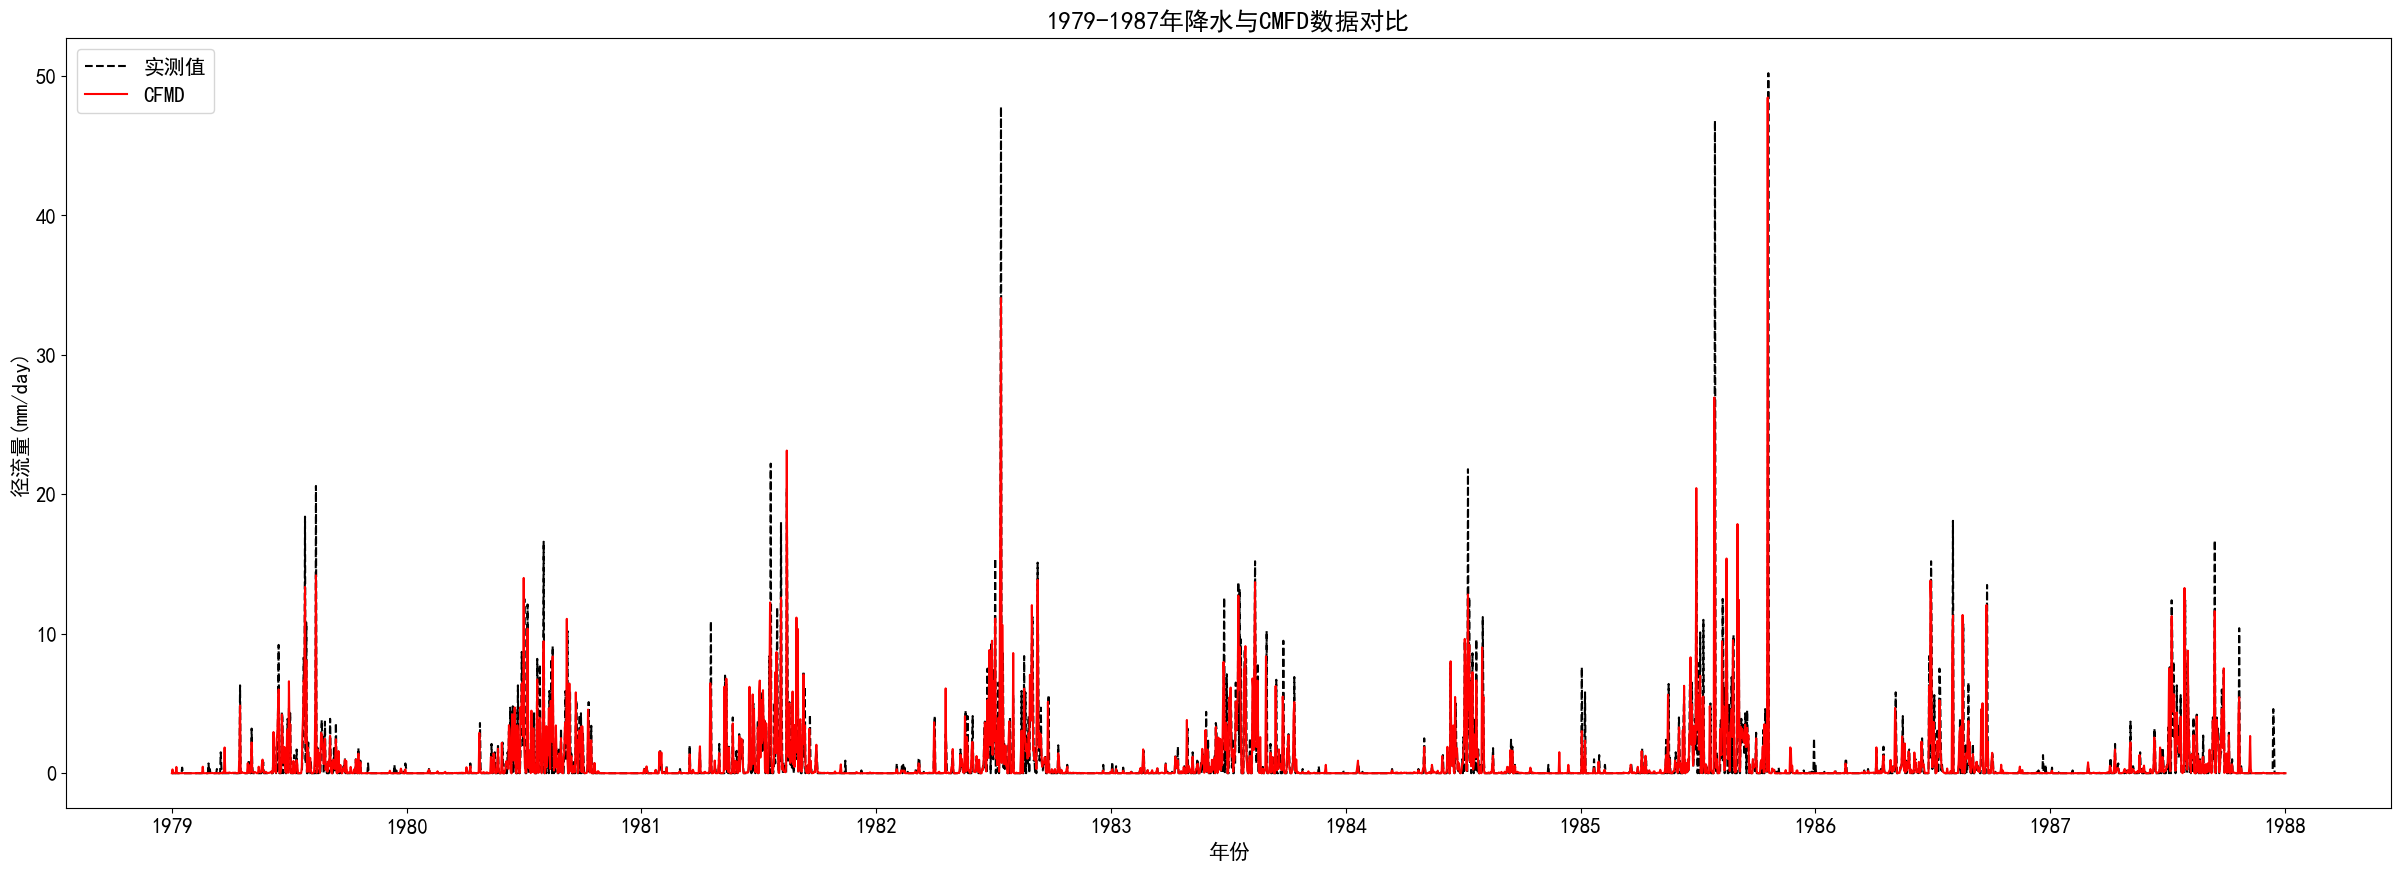

In [9]:
# 画图  
#  设置画图字体的大小
plt.rcParams.update({'font.size': 15})
#  解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
#  解决负号乱码问题
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(111)
y1 = PRCP_daily#实测径流量 
y2 = PRCPDataArray 
#y3 = modelDataArray2
#y4 = modelDataArray4
ax.plot( y1, 'k--', label='实测值') 
ax.plot( y2, 'r-', label='模拟1')
#ax.plot( y3, 'r--', label='模拟2')
#ax.plot( y4, 'b--', label='模拟3')


ax.set_xlabel('年份')  
ax.set_ylabel('径流量(mm/day)')
#ax.set_yticks(np.arange(0, 250,50))
ax.set_xticks(np.arange(0, 3286, 365), ['1979','1980','1981','1982','1983','1984','1985','1986','1987','1988']) 
ax.set_title("1979-1987年降水与CMFD数据对比")
ax.legend(['实测值','CFMD','模拟3'],loc='upper left')

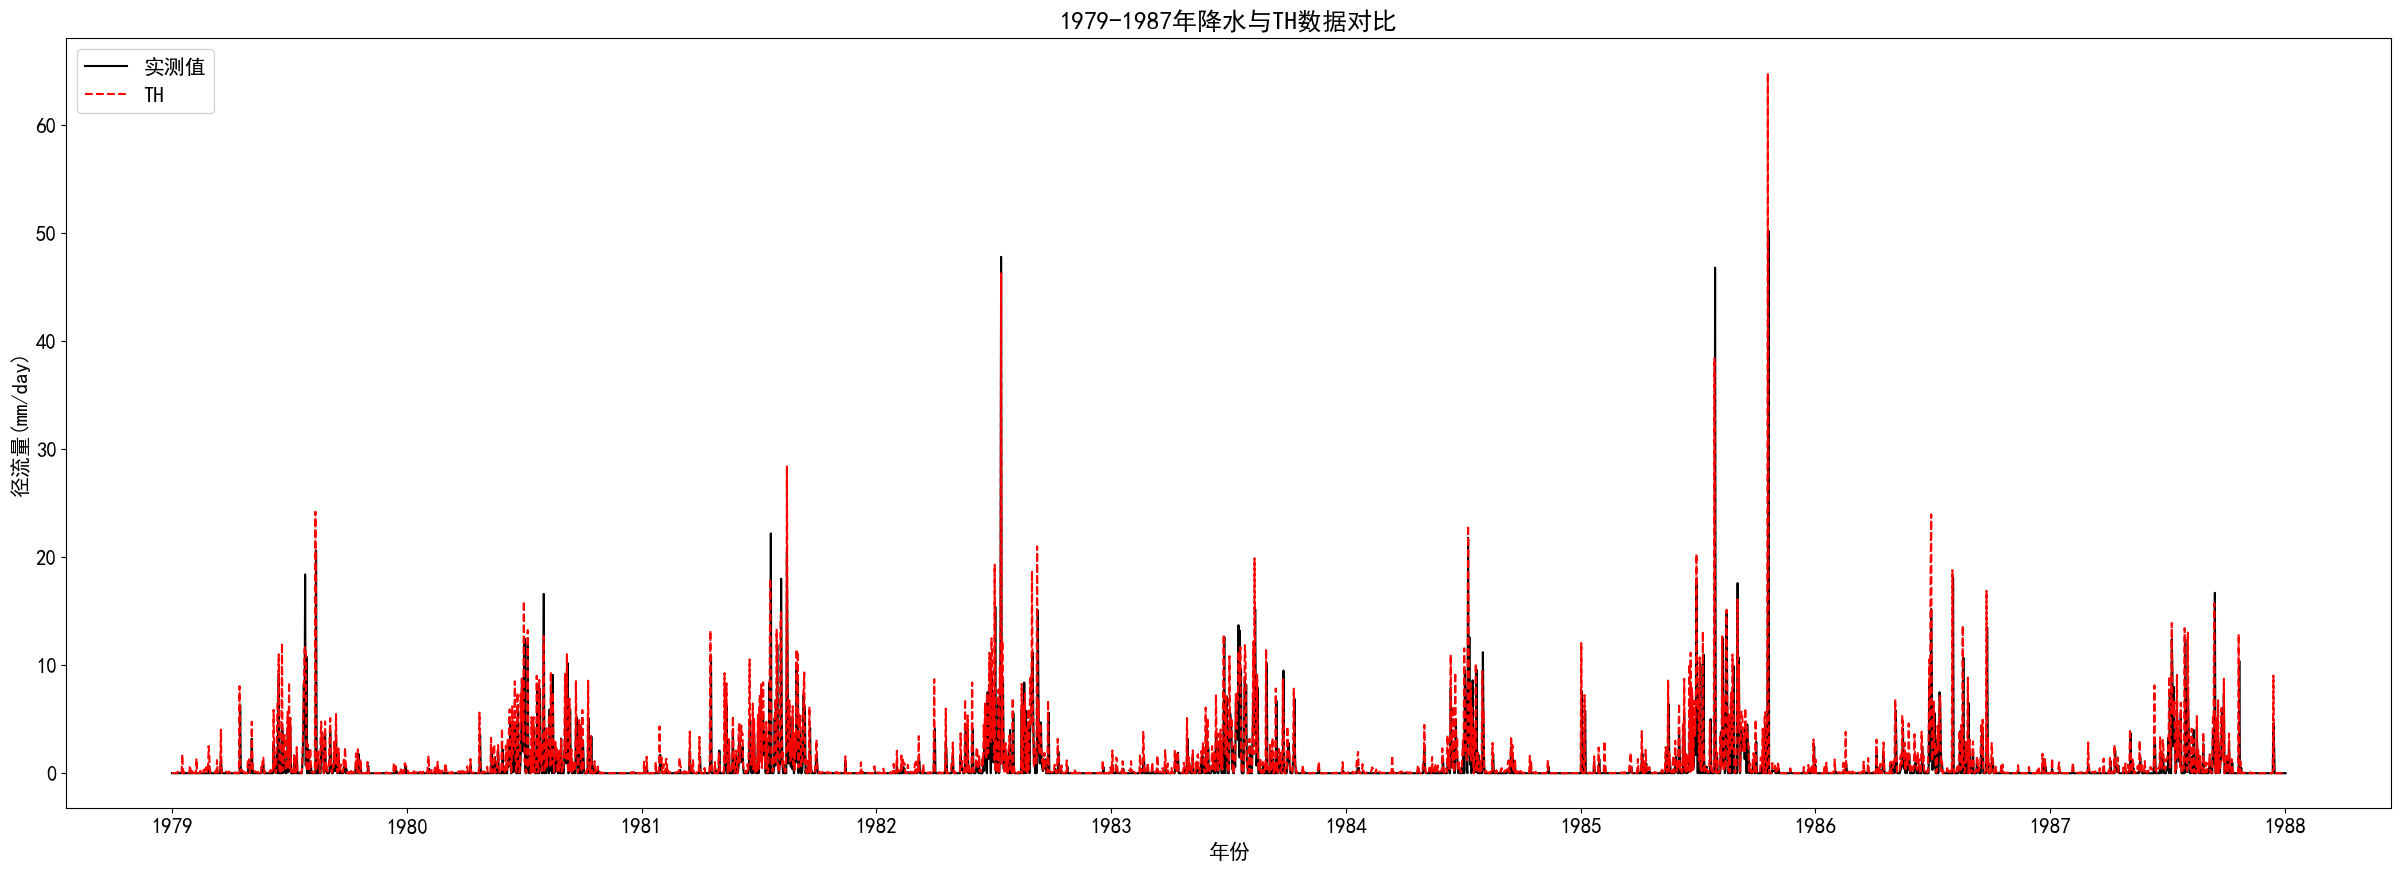

In [10]:
# 画图  
#  设置画图字体的大小
plt.rcParams.update({'font.size': 15})
#  解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
#  解决负号乱码问题
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(111)
y1 = PRCP_daily#实测径流量 
y2 = PRCPDataArray1
#y3 = modelDataArray2
#y4 = modelDataArray4
ax.plot( y1, 'k', label='实测值') 
ax.plot( y2, 'r--', label='模拟1')
#ax.plot( y3, 'r--', label='模拟2')
#ax.plot( y4, 'b--', label='模拟3')


ax.set_xlabel('年份')  
ax.set_ylabel('径流量(mm/day)')
#ax.set_yticks(np.arange(0, 250,50))
ax.set_xticks(np.arange(0, 3286, 365), ['1979','1980','1981','1982','1983','1984','1985','1986','1987','1988']) 
ax.set_title("1979-1987年降水与TH数据对比")
ax.legend(['实测值','TH','模拟3'],loc='upper left')

降水再分析资料指标函数

In [22]:

print(len(PRCP_daily))
print(len(PRCPDataArray))
PRCP_daily = np.array(PRCP_daily)
PRCPDataArray = np.array(PRCPDataArray)
PRCPDataArray1 = np.array(PRCPDataArray1)
corr = np.corrcoef(PRCP_daily, PRCPDataArray1)




3287
3287
[[nan nan]
 [nan  1.]]


In [25]:
import numpy as np

def pearson_correlation(x, y):

    # 输入检查
    if not isinstance(x, np.ndarray) or not isinstance(y, np.ndarray):
        raise TypeError('x和y应该是numpy数组')

    if len(x) != len(y):
        raise ValueError('x和y长度不匹配')

    # 替换数组中的nan和inf
    x = np.nan_to_num(x)
    y = np.nan_to_num(y)

    # 计算皮尔逊相关系数
    corr = np.corrcoef(x, y)[0,1]
    
    # 返回结果
    return corr
pearson_correlation(PRCP_daily, PRCPDataArray)


0.7493641657861209